In [1]:
from google.colab import drive
drive.mount('content')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at content


In [2]:
!unzip '/content/content/My Drive/ECE4179 Project/Data/maps.zip'
!unzip '/content/content/My Drive/ECE4179 Project/Data/Train Imgs.zip'

Archive:  /content/content/My Drive/ECE4179 Project/Data/maps.zip
   creating: savedfiles/
  inflating: savedfiles/slide001_core003_classimg_nonconvex.png  
  inflating: savedfiles/slide001_core004_classimg_nonconvex.png  
  inflating: savedfiles/slide001_core005_classimg_nonconvex.png  
  inflating: savedfiles/slide001_core006_classimg_nonconvex.png  
  inflating: savedfiles/slide001_core007_classimg_nonconvex.png  
  inflating: savedfiles/slide001_core008_classimg_nonconvex.png  
  inflating: savedfiles/slide001_core009_classimg_nonconvex.png  
  inflating: savedfiles/slide001_core010_classimg_nonconvex.png  
  inflating: savedfiles/slide001_core011_classimg_nonconvex.png  
  inflating: savedfiles/slide001_core012_classimg_nonconvex.png  
  inflating: savedfiles/slide001_core014_classimg_nonconvex.png  
  inflating: savedfiles/slide001_core018_classimg_nonconvex.png  
  inflating: savedfiles/slide001_core030_classimg_nonconvex.png  
  inflating: savedfiles/slide001_core037_classimg_n

In [0]:
import os
import cv2
import copy
import matplotlib.pyplot as plt

In [4]:
images = [x for x in os.listdir('/content/Train Imgs')]
maps = [x for x in os.listdir('/content/savedfiles')]

images.sort()
maps.sort()

if len(images) != len(maps):
  print(len(images), len(maps))

244 247


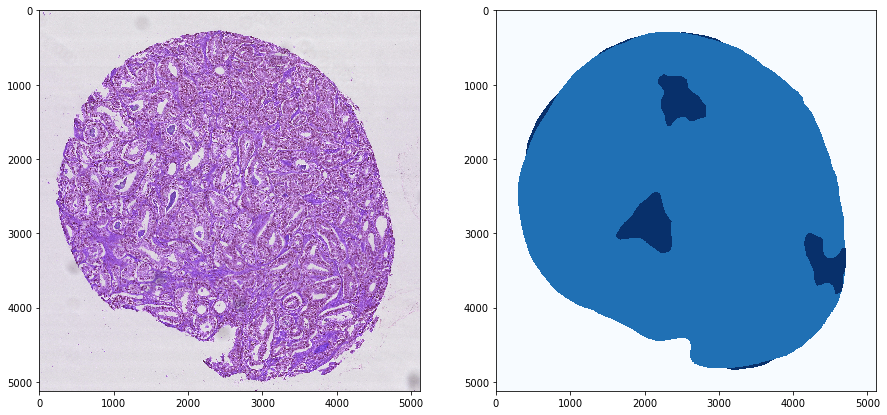

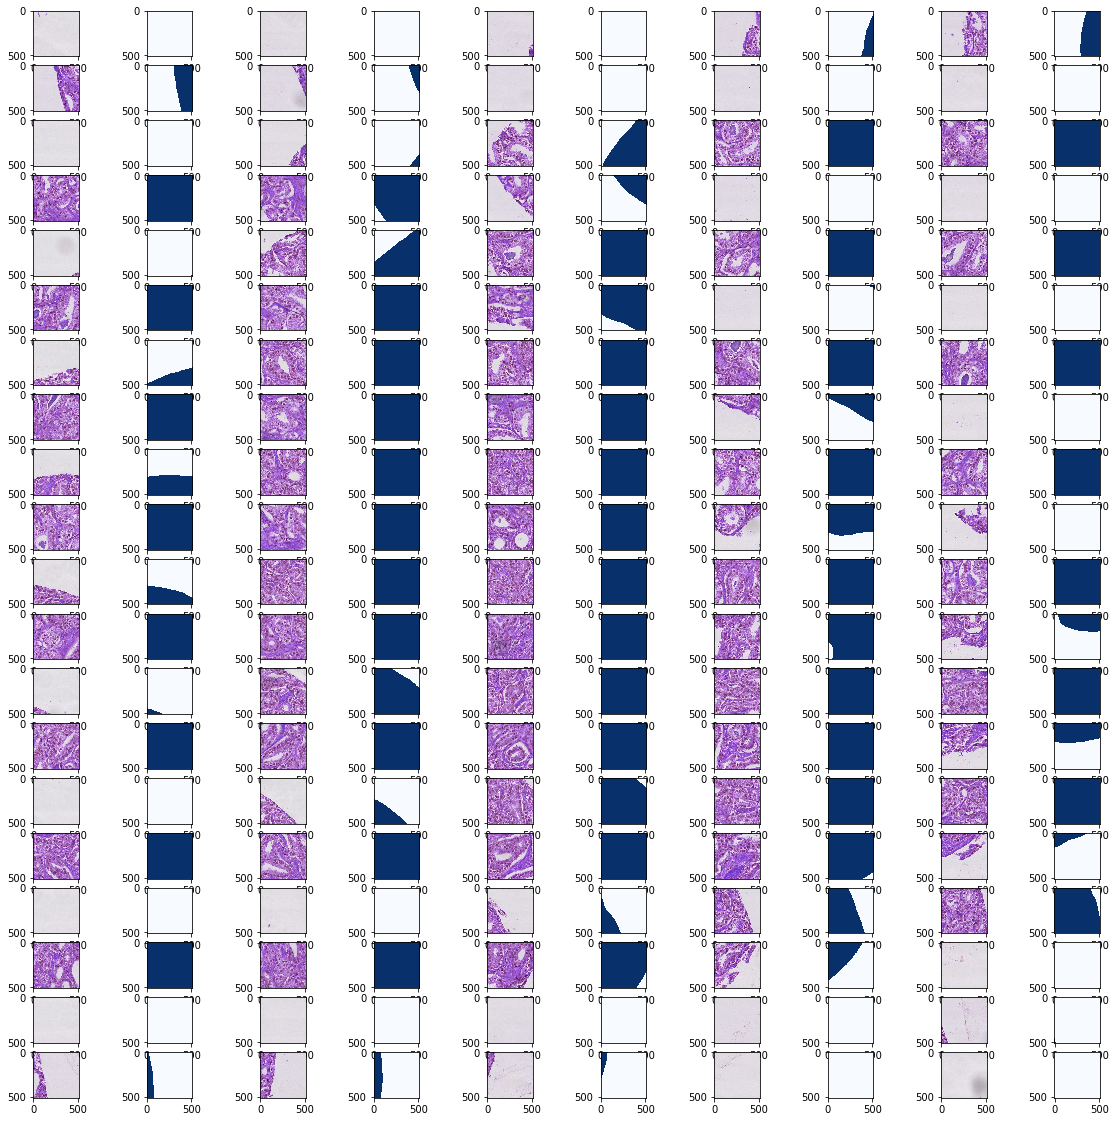

In [34]:
image = cv2.imread('/content/Train Imgs/'+images[10])
MAP = cv2.imread('/content/savedfiles/'+images[10].split('.')[0]+'_classimg_nonconvex.png')

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
ax.imshow(image)
ax = fig.add_subplot(1,2,2)
ax.imshow(MAP[:,:,0], cmap='Blues')

h, w, c = image.shape

horizontal_crops = int(w/512)
vertical_crops = int(h/512)

fig = plt.figure(figsize=(20,20))

counter = 0
for x in range(horizontal_crops):
  for y in range(vertical_crops):
    img_crop = copy.deepcopy(image[y*512:y*512+512, x*512: x*512+512, :])
    map_crop = copy.deepcopy(MAP[y*512:y*512+512, x*512: x*512+512,0])
    
    ax = fig.add_subplot(horizontal_crops*2, vertical_crops, counter*2+1)
    ax.imshow(img_crop)
    
    ax = fig.add_subplot(horizontal_crops*2, vertical_crops, counter*2+2)
    ax.imshow(map_crop, cmap='Blues', vmin=0, vmax=10/255)
    
    counter+=1

In [0]:
widths = []
heights = []

for image in images: 
  
  img = cv2.imread('/content/Train Imgs/'+image)
  
  h, w, c = img.shape
    
  if w not in widths:
    widths.append(w)
  
  if h not in heights:
    heights.append(h)
    
print(widths, heights)

[5120, 4608, 5632] [5120, 5632, 4608]


In [0]:
# !rm -r '/content/map_crops'

In [0]:
os.mkdir('/content/content/My Drive/ECE4179 Project/Data/Image_crops')
os.mkdir('/content/content/My Drive/ECE4179 Project/Data/Map_crops')

In [0]:
img_count=0
for image in images:
  img_count+=1
  print('Processing image {}/{}, number of images: {}'.format(img_count, len(images), len(os.listdir('/content/content/My Drive/ECE4179 Project/Data/Image_crops'))))
  
  img = cv2.imread('/content/Train Imgs/'+image, -1)
  Map = cv2.imread('/content/savedfiles/'+image.split('.')[0]+'_classimg_nonconvex.png', -1)  
  
  h, w, c = img.shape
  
  horizontal_crops = int(w/512)
  vertical_crops = int(h/512)
  
  counter = 0
  for x in range(horizontal_crops):
    for y in range(vertical_crops):
      counter +=1
      img_crop = copy.deepcopy(img[y*512:y*512+512, x*512: x*512+512, :])
      map_crop = copy.deepcopy(Map[y*512:y*512+512, x*512: x*512+512])
            
      img_name = '/content/content/My Drive/ECE4179 Project/Data/Image_crops/{}_crop{:04}.png'.format(image.split('.')[0], counter)
      map_name = '/content/content/My Drive/ECE4179 Project/Data/Map_crops/{}_classimg_nonconvex_crop{:04}.png'.format(image.split('.')[0], counter)
       
      cv2.imwrite(img_name, img_crop)
      cv2.imwrite(map_name, map_crop) 

Processing image 1/244, number of images: 0
Processing image 2/244, number of images: 100
Processing image 3/244, number of images: 200
Processing image 4/244, number of images: 300
Processing image 5/244, number of images: 410
Processing image 6/244, number of images: 520
Processing image 7/244, number of images: 620
Processing image 8/244, number of images: 720
Processing image 9/244, number of images: 830
Processing image 10/244, number of images: 929
Processing image 11/244, number of images: 1028
Processing image 12/244, number of images: 1128
Processing image 13/244, number of images: 1228
Processing image 14/244, number of images: 1338
Processing image 15/244, number of images: 1438
Processing image 16/244, number of images: 1538
Processing image 17/244, number of images: 1638
Processing image 18/244, number of images: 1738
Processing image 19/244, number of images: 1848
Processing image 20/244, number of images: 1938
Processing image 21/244, number of images: 2028
Processing im